In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = 'C:\\Users\\kuche\\Desktop\\insurance_data.csv '
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(10)
#data.info()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [60]:
# Checking for missing values
missing_values = data.isnull().sum()

# Checking for duplicates
duplicates = data.duplicated().sum()

# Displaying the missing values and duplicates
missing_values, duplicates


(index            0
 PatientID        0
 age              5
 gender           0
 bmi              0
 bloodpressure    0
 diabetic         0
 children         0
 smoker           0
 region           3
 claim            0
 dtype: int64,
 0)

In [61]:
# Fill missing values for 'age' with the median
data['age'].fillna(data['age'].median(), inplace=True)

# Fill missing values for 'region' with the mode
data['region'].fillna(data['region'].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after = data.isnull().sum()
missing_values_after


index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [62]:
# Summary of numerical features
print(data.describe())

# Summary including categorical features
print(data.describe(include='all'))

             index    PatientID          age          bmi  bloodpressure  \
count  1340.000000  1340.000000  1340.000000  1340.000000    1340.000000   
mean    669.500000   670.500000    38.078358    30.668955      94.157463   
std     386.968991   386.968991    11.082176     6.106735      11.434712   
min       0.000000     1.000000    18.000000    16.000000      80.000000   
25%     334.750000   335.750000    29.000000    26.275000      86.000000   
50%     669.500000   670.500000    38.000000    30.400000      92.000000   
75%    1004.250000  1005.250000    47.000000    34.700000      99.000000   
max    1339.000000  1340.000000    60.000000    53.100000     140.000000   

          children         claim  
count  1340.000000   1340.000000  
mean      1.093284  13252.745642  
std       1.205334  12109.609288  
min       0.000000   1121.870000  
25%       0.000000   4719.685000  
50%       1.000000   9369.615000  
75%       2.000000  16604.305000  
max       5.000000  63770.430000  


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


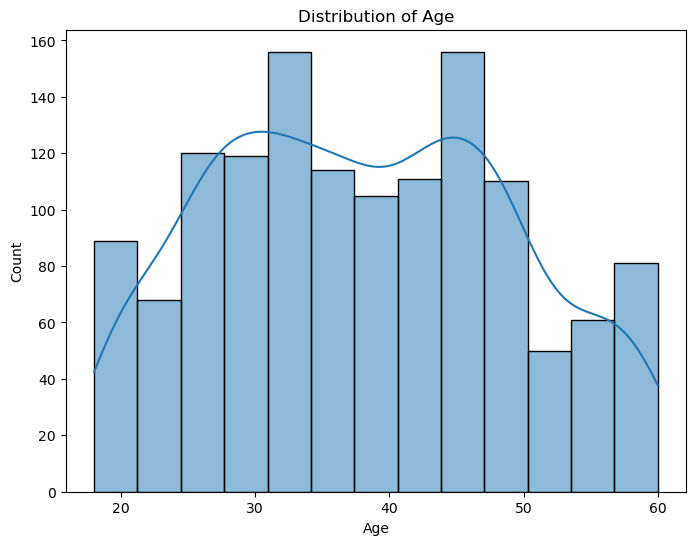

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram for age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

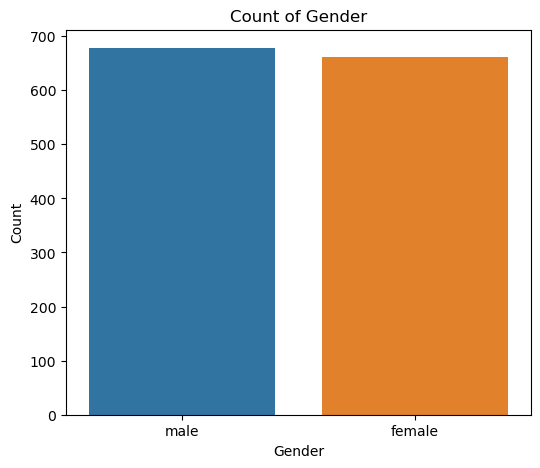

In [64]:
# Count plot for gender
plt.figure(figsize=(6, 5))
sns.countplot(x='gender', data=data)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


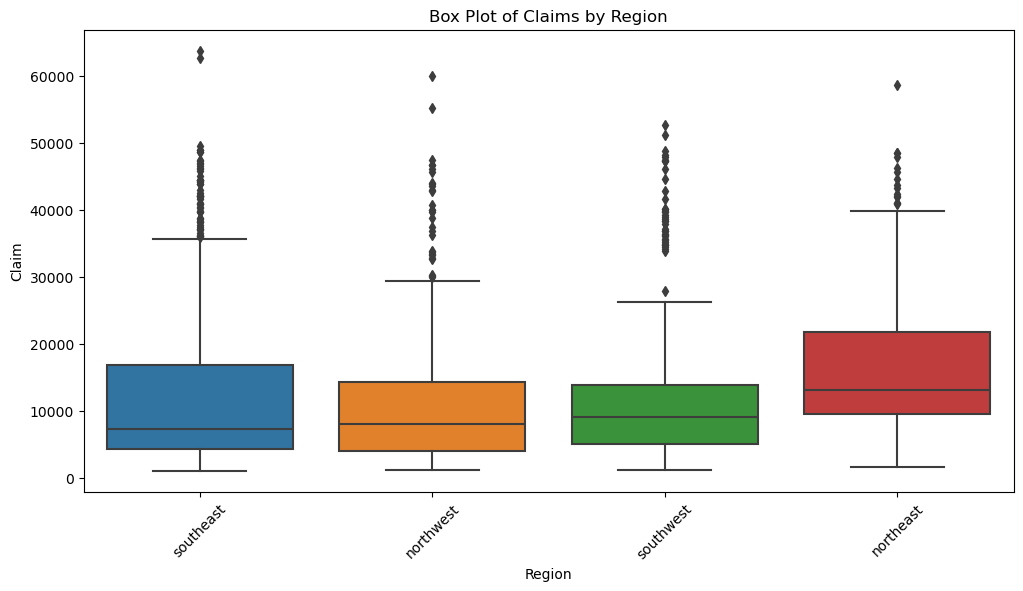

In [65]:
# Box plot of claims by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='region', y='claim')
plt.title('Box Plot of Claims by Region')
plt.xlabel('Region')
plt.ylabel('Claim')
plt.xticks(rotation=45)
plt.show()


In [66]:
# Compute average claim by smoking status
average_claims_by_smoker_status = data.groupby('smoker')['claim'].mean().reset_index()

# Compute total claim by smoking status
total_claims_by_smoker_status = data.groupby('smoker')['claim'].sum().reset_index()


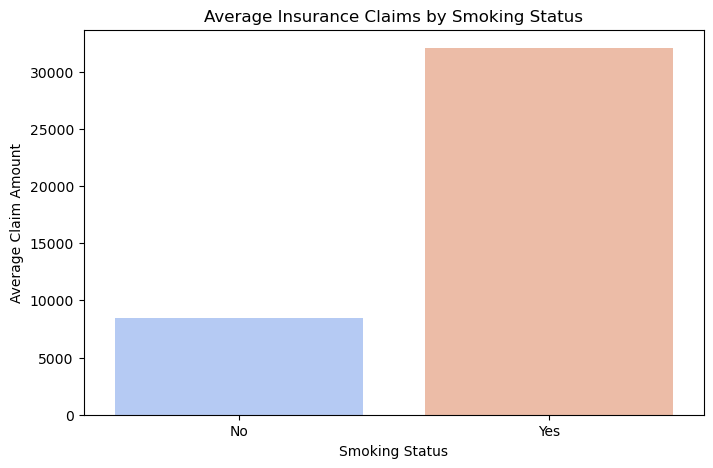

In [67]:
plt.figure(figsize=(8, 5))

# Bar plot for average claims
sns.barplot(data=average_claims_by_smoker_status, x='smoker', y='claim', palette='coolwarm')
plt.title('Average Insurance Claims by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Claim Amount')
plt.show()


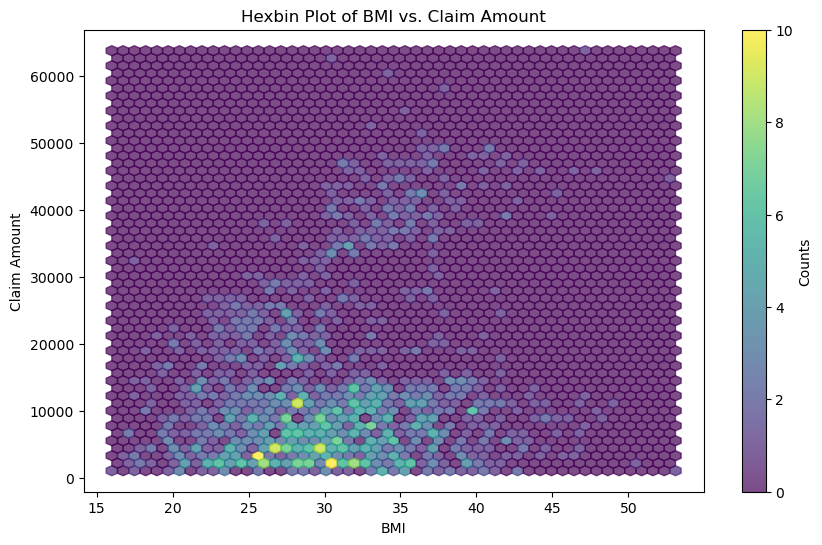

In [68]:
# Charge by BMI
plt.figure(figsize=(10, 6))
plt.hexbin(data['bmi'], data['claim'], gridsize=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of BMI vs. Claim Amount')
plt.xlabel('BMI')
plt.ylabel('Claim Amount')
plt.show()


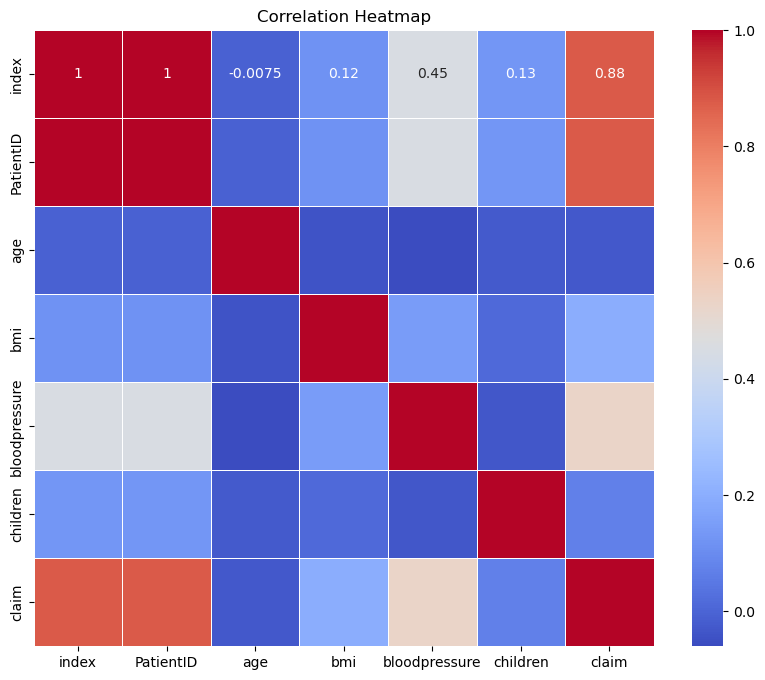

In [58]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()